# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [169]:
import numpy as np
import matplotlib.pyplot as plt


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [170]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data = data.astype(int)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [171]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];

In [172]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100,)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [173]:
def Sigmoid(z):
    sigma = 1/(1 + np.exp(-z))
    return sigma

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [174]:
def computeCost(X, y, theta):
    # To compute the parameter which we are going to pass to the sigmoid function (an array), in order to compute the response of each data point.
    z = np.sum(theta.transpose() * X, axis=1) 
    # To calculate the response the response of the model for each data point with the given theta values.
    h_theta = Sigmoid(z) 
    # Cost function when the target = 0. (y=0).
    cost_0 = (1-y) * np.log(1-h_theta)
    # Cost function when the target = 1. (y=1).
    cost_1 = y * np.log(h_theta)
    # Full cost function.
    j_theta = -np.sum(cost_0 + cost_1)/X.shape[0]
    return j_theta , h_theta # Return the cost and the responses of the model which will be used later on to calculate the gradient of the cost function.
  

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [175]:
def costGradient(X,y,h_theta):
    # This function is used to calculate the calculate the partial derivatives of the cost function (gradient with respect to theta_0 and theta_1).
    # Theta_i gradient = (1/m) * sum((Sigma(Xi)-Yi) * Xi) where m is the number of examples and i = 0 ... m.
    # when i = 0, Xi is a vector of ones (the intercept vector) so the formula in this case is equivalent to (1/m) * sum(Sigma(Xi)-Yi).
    gradient = np.array([])
    
    diff = h_theta - y # Sigma(Xi)-Yi => model_responses - target_values : the errors of the model (residuals).
    # Cost Gradient with respect to all of theta_i:
    for k in range(0,X.shape[1]):
        gTheta_i = np.sum(diff * X[:,k]) / X.shape[0] # Theta_i gradient = (1/m) * sum((Sigma(Xi)-Yi) * Xi).
        gradient = np.append(gradient,gTheta_i ) # To add the gradient of theta_i to the array of the other gradients.
    return gradient # Return the cost gradient which will be used to optimize the theta values.

def gradientDescent(X, y, theta, alpha, iterations):
    # The gradient descent is used to optimize theta values (model parameters "intercept and slope").
    modalSettings = np.array([]) # An array which is going to be used to contain the costs.
    # To repeat the steps of gradient descent algorithm until we reach the maximum number of iterations or ....
    for i in range(0,iterations):
        # To compute the cost and the responses of the model with the current theta values.
        cost, h_theta =computeCost(X, y, theta)
        # To save the cost of the current model with its parameters ( theta_i ).
        modalSettings = np.append(modalSettings,theta[:])
        modalSettings = np.append(modalSettings,cost)
        # To calculate the gradient of the cost function with of the current model.
        cost_gradient = costGradient(X,y,h_theta)
        # To calculate the new theta values ( optimized parameters ).
        theta = theta.transpose() - (alpha * cost_gradient)
        theta = theta.transpose()
    modalSettings = modalSettings.reshape((iterations,theta.shape[0]+1)) # To form a 2D array where each line i contains theta and the cost of the i-th iterration.
    return (theta, modalSettings) # To return the parameters of the model which fits better the dataset and the costs of the different models.

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [176]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial

In [177]:
initialCost, h_theta=computeCost(X, y, theta)
print(initialCost)

0.6931471805599453


Appel des la fonction de calcul du gradient

In [178]:
# paramètres
iterations = 10000;
alpha = 0.02;
# Appel
theta, modalSettings = gradientDescent(X, y, theta, alpha, iterations);
print(theta)

[[-7.42996946]
 [ 0.34046771]
 [ 0.30528579]]


Traçage de la fonction du coût

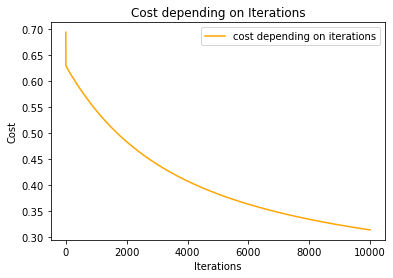

In [179]:
# Cost depending on iterations.
plt.plot(np.array([i for i in range(0,iterations)]), modalSettings[:,3] ,color='orange', label='cost depending on iterations')
plt.title('Cost depending on Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend(loc='best')

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [180]:
def drawLine():
    pass
    

# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

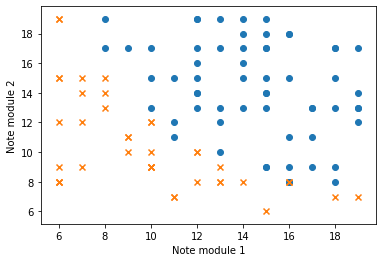

In [181]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

Traçage du coût en fonction de theta0 et theta1

Prédire des valeurs de y

In [182]:
# Predire pour des notes note1= 9 et note2=17
predict1 = np.matmul([1, 9 , 17],theta);
predict1


array([0.82409843])

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 25 Mars 2022 à 22h


In [183]:
# bonne chance